# Trabajo Práctico 1 - Organización de Datos
## Análisis exploratorio de datos de TROCAFONE
### Facultad de Ingeniería de la Universidad de Buenos Aires
### 95-58: Organización de Datos - 2do Cuat. 2018

#### Integrantes: Gonzalo Diz,  Ariel Windey, Gabriel Robles y Matías



## Análisis Exploratorio sobre el set de datos

En este apartado se pretende lograr un entendimiento básico de los datos con los que se cuenta y se va a trabajar. Exploraremos los datos sin (aún) hacerse preguntas sobre los mismos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 51)

# Carga del set de datos
df = pd.read_csv('./data/events.csv')

Tomamos 10 muestras de los datos, simplemente para ver cómo vienen.

In [2]:
df.sample(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
122236,2018-06-01 13:50:01,viewed product,20759cf2,NaN,"10,154.00",iPhone 7 Plus,Bom,128GB,Preto Matte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992413,2018-04-28 14:34:00,viewed product,fb7ec745,NaN,"8,247.00",iPhone SE,Bom,64GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16274,2018-05-11 15:28:53,brand listing,0473a6d5,NaN,NaN,NaN,NaN,NaN,NaN,"3371,6357,6371,3179,2777,6791,3191,2725,12786,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22437,2018-05-20 19:43:32,ad campaign hit,05f89919,/comprar/iphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161080,2018-06-12 12:05:02,search engine hit,2aa711ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796255,2018-05-16 21:47:39,brand listing,cb9ca8a5,NaN,NaN,NaN,NaN,NaN,NaN,"6454,7575,3167,11416,11428,6567,3241,6469,3252...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696166,2018-06-08 20:03:27,search engine hit,b34c674e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809603,2018-05-16 15:21:39,viewed product,ce92e44e,NaN,"9,763.00",Quantum GO 4G,Muito Bom,32GB,Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13552,2018-05-23 20:44:49,viewed product,038dd4e0,NaN,"3,335.00",Samsung Galaxy S6 Edge,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004770,2018-05-26 14:54:08,search engine hit,fe50b30c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1011288, 23)

El dataset cuenta con 1011288 datos (observaciones) con 23 atributos

#### Como primera observación, podemos decir que hay una gran cantidad de valores nulos: parecen predominar en el set de datos.


Se chequeará el tipo de dato asignado a los daots importados.
La función *load_csv()* se utilizó sin el parámetro que indica el tipo de dato de cada atributo, por lo que es natural que sean del tipo *object*.

In [4]:
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Creemos importante transformar el atributo *timestamp* dado que como object no es amigable de trabajar. Convirtiéndolo a tipo *datetime* se podrán aprovechar features de pandas sobre este tipo de datos.

Además, los siguientes campos pueden ser categóricos

In [5]:
df['condition'].value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [6]:
df['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [7]:
df['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [8]:
df['country'].value_counts().head()

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Canada              35
Name: country, dtype: int64

In [9]:
df['device_type'].value_counts().head()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

Por lo tanto se harán las siguientes transformaciones de datos:

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.condition = pd.Categorical(df.condition)
df.channel = pd.Categorical(df.channel)
df.new_vs_returning = pd.Categorical(df.new_vs_returning)
#df.country = pd.Categorical(df.country)
#df.device_type = pd.Categorical(df.device_type)

In [11]:
df.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                         category
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                           category
new_vs_returning                  category
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

#### Nos hacemos las siguientes preguntas:

1. ¿En qué proporción son nulos los atributos?
2. ¿Existe alguna correlación entre atributos nulos y tipos de evento?
3. ¿Todos los nulos que existen obedecen a la regla de "no todos los atributos se corresponden con todos los eventos", o son por dato faltante?
4. ¿Cual es la proporción entre distintos tipos de eventos en este set de datos?
5. ¿Cual es el rango temporal de los datos?

#### 1. ¿En qué proporción son nulos los atributos?

In [12]:
atributes_null = (df.isna().sum().sort_values() / df.shape[0]) * 100

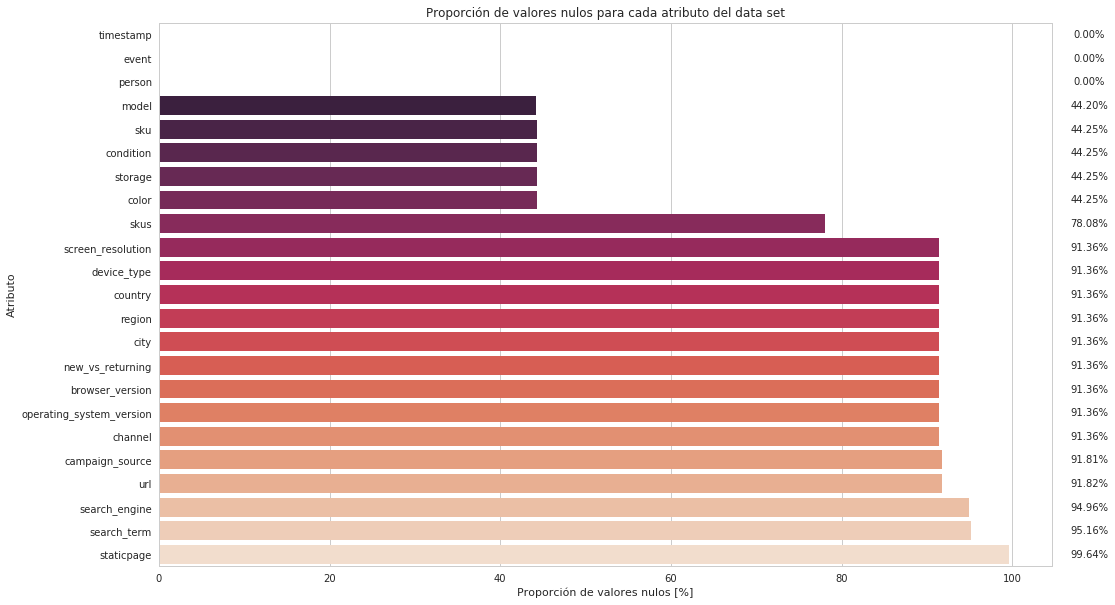

In [13]:
# sns.barplot(x=df_null.index, y=df_null.values, palette="rocket", orient="h")
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette='rocket', orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo del data set")
ax.set(xlabel='Proporción de valores nulos [%]', ylabel='Atributo')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center')

In [14]:
total_null = {'null' : atributes_null.mean(), 'non-null' : 100-atributes_null.mean()}

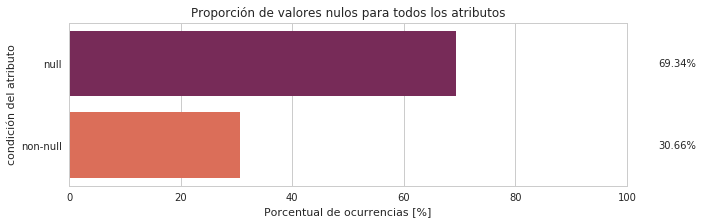

In [15]:
ax2 = sns.barplot(y=pd.Series(total_null).index, x=pd.Series(total_null).values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 3)
ax2.axes.set_xlim(0,100)

plt.title("Proporción de valores nulos para todos los atributos")
ax2.set(xlabel='Porcentual de ocurrencias [%]', ylabel='condición del atributo')

for p in ax2.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center')

Como puede observarse, hay tres atributos que nunca son nulos: timestamp, event y person.
Además, existen grupos de atributos con una proporción idéntica de valores nulos.

#### 2. ¿Existe alguna correlación entre atributos nulos y tipos de evento?

Todo indica que sí, el enunciado aclara:

>"Algo a tener en cuenta es que no todos los datos descritos en las columnas corresponde a todos los tipos de eventos."

Lo que intentaremos responder entonces es ¿Qué atributo se corresponde con qué tipo de evento?

Para responder esto agruparemos el data frame por tipo de evento y setearemos el mismo como índice de fila [1]. Luego, aplicaremos una función lambda para sumar la cantidad de observaciones no nulas [2].
Por último, normalizaremos cada suma de apariciones no nulas, dividéndola por el total de apariciones de ese evento, que no es otra cosa que la cantidad de atributos 'timestamp' no nulos (se vió que este atributo nunca es nulo) [3].

In [16]:
# [1]
df_event_index = df.set_index('event')
# [2]
event_vs_null_atr = df_event_index.groupby('event').apply(lambda x=0: x.notnull().sum())
# [3]
n_event_vs_null_atr = event_vs_null_atr.apply(lambda x: (x/x.max()) * 100, axis=1)
n_event_vs_null_atr

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
event,,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,100.00,100.00,99.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
brand listing,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
checkout,100.00,100.00,0.00,100.00,99.99,99.99,99.99,99.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
conversion,100.00,100.00,0.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
generic listing,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lead,100.00,100.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
search engine hit,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
searched products,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.79,87.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
staticpage,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


[Text(17.2,0.5,'condición del atributo'),
 Text(0.5,17.2,'Porcentual de apariciones [%]')]

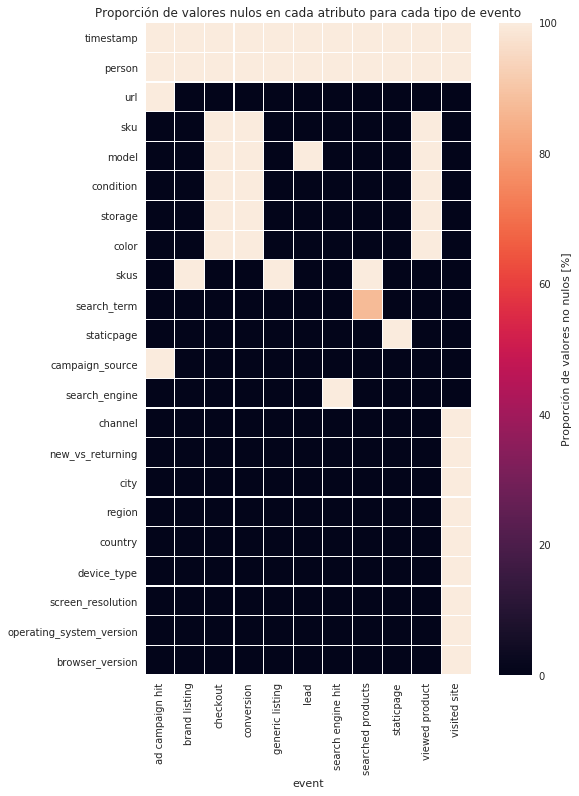

In [17]:
hmp = sns.heatmap(n_event_vs_null_atr.transpose(), linecolor='white', xticklabels=True, yticklabels=True, linewidths=0.2, square=True, cbar_kws={'label': 'Proporción de valores no nulos [%]'})
fig = plt.gcf()
fig.set_size_inches(10, 12)

plt.title("Proporción de valores nulos en cada atributo para cada tipo de evento")
ax2.set(xlabel='Porcentual de apariciones [%]', ylabel='condición del atributo')

En el anterior gráfico se respode la pregunta de ¿Qué atributo se corresponde con qué tipo de evento?

Haciendo una lectura horizontal, puede observarse que:

1. Puede observarse que los atributos timestamp y person son comunes a todos los eventos
2. El atributo url sólo corresponde al evento ad_campaign_hit
3. Los atributos sku, condition, storage y color son compartido entre los eventos checkout, conversion y viewed product.
4. El atributo model es compartido entre checkout, conversion, lead y viewed product.
5. El atributo skus le corresponde a los eventos brand listing, generic listinc y searched products
6. El atributo search tearm sólamente le corresponde al evento searched products. Cabe destacar que el mismo no aparece como valor no nulo en un 100% de las observaciones.
7. El atributo static page le corresponde al evento staticpage únicamente.
8. El atriuto campaign source le corresponde únicamente al evento ad campaign hit.
9. El atriuto search engine le corresponde únicamente al evento sarch engine hit.
10. Los atributos channel, new_vs_returning, city, region, country, device_type, screen resolution, operating system version, y browser version le corresponden únicamente al evento visited site.

####  3. ¿Todos los nulos que existen obedecen a la regla de "no todos los atributos se corresponden con todos los eventos", o son por dato faltante?

En el anterior gráfico puede observarse claramente que la regla de "no todos los atributos se corresponden con todos los eventos" se cumple. Esto explica que haya tanta cantidad de atributos nulos. Sin embargo, existen atributos que se corresponden a un tipo de evento que tienen una pequeña proporción de observaciones nulas.

El caso mas notorio es para el evento 'searched products' con su atributo 'search term' con un aproximado de 13% de oservaciones nulas. Dicho evento significa "El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site." por lo que podemos asumir que el usuario hizo una búsqueda sin un string particular.

El resto de atriutos nulos para ciertos tipos de eventos puede ser despreciable, ya que no superan el 0,1%.

#### ¿Cual es la proporción entre distintos tipos de eventos en este set de datos?

In [18]:
events = df['event'].value_counts()
events

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Rápidamente puede observarse que el evento predominante es 'viewed product'. Primero compararemos este evento contra el resto.

In [19]:
events_index = ['viewed product', 'others']
events_vp_others = pd.Series(events.groupby(events.index != 'viewed product').sum().values, index=['viewed product', 'otros'])

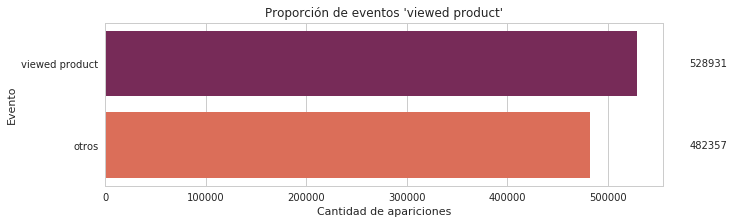

In [20]:
ax2 = sns.barplot(y=events_vp_others.index, x=events_vp_others.values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 3)
#ax2.axes.set_xlim(0,100)

plt.title("Proporción de eventos 'viewed product'")
ax2.set(xlabel='Cantidad de apariciones', ylabel='Evento')

for p in ax2.patches:
    width = p.get_width()
    plt.text(p.get_x()+600000, p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

Luego compararemos todos los eventos que no son 'viewed product'

[Text(0,0.5,'Evento'), Text(0.5,0,'Proporción de ocurrecias [%]')]

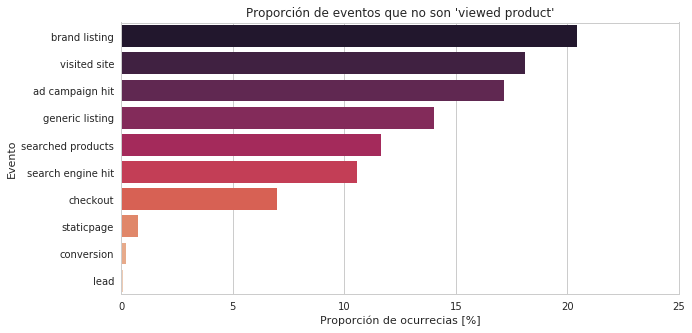

In [21]:
event_others = events[events.index != 'viewed product']
event_others = event_others / event_others.sum() * 100

ax2 = sns.barplot(y=event_others.index, x=event_others.values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 5)
ax2.axes.set_xlim(0,25)

plt.title("Proporción de eventos que no son 'viewed product'")
ax2.set(xlabel='Proporción de ocurrecias [%]', ylabel='Evento')

#### 5. ¿Cual es el rango temporal de los datos?

In [22]:
df_c = df.copy()
df_c["timestamp"] = df['timestamp'].dt.date
pivot = df_c.groupby(['event', 'timestamp']).agg({'person' : 'count'})
pivot = pivot.pivot_table(index='timestamp', columns='event', values='person')

Text(0.5,1,'Mapa de calor para los eventos (*) a lo largo del dataset')

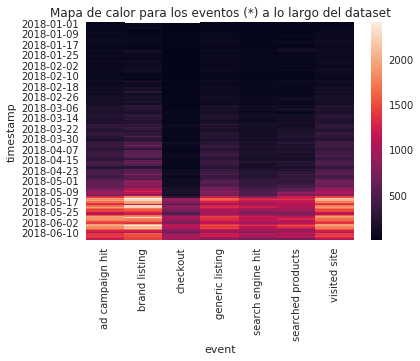

In [23]:
hp = sns.heatmap(pivot.drop(['viewed product', 'conversion', 'lead', 'staticpage'], axis=1))
plt.title("Mapa de calor para los eventos (*) a lo largo del dataset")

(*) Para este gráfico se descartartó el eventos 'viewed product' (por ser altamente predominante) y los eventos 'conversion', 'lead' y 'staticpage' por tener una presencia muy inferior al resto.

Pude observarse que existen datos a partir de 2018 hasta mediados del mes de Junio. Además, la cantidad de eventos se disparó hasta tres veces a partir de mediados de mayo.

## Análisis sore S.O. y dispositivos


Queremos ver en que tipo de dispositivo acceden por primera vez los usuarios

In [24]:
# Primero agregamos unas columnas sobre el timestamp
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
df['week_year'] = df['timestamp'].dt.weekofyear
df['week'] = df['timestamp'].dt.week
df['year'] = df['timestamp'].dt.year
df['day_week'] = df['timestamp'].dt.dayofweek
df['month_day'] = df['timestamp'].dt.day
df['is_weekend'] = (df.day_week == 5) | (df.day_week == 6)

events_count_per_week = df['week_year'].value_counts()
events_count_per_week.sort_values(axis=0, ascending=True)
events_count_per_week = events_count_per_week.to_frame()
events_count_per_week['week'] = events_count_per_week.index
events_count_per_week.sort_values(by='week', inplace=True)
print(events_count_per_week)

    week_year  week
1        2710     1
2        4497     2
3        4918     3
4        4922     4
5        5086     5
6        4989     6
7        6398     7
8        8822     8
9       10310     9
10      13879    10
11      16893    11
12      21607    12
13      21382    13
14      26487    14
15      28613    15
16      27712    16
17      38581    17
18      51040    18
19      72658    19
20     146430    20
21     124961    21
22     142782    22
23     140573    23
24      85038    24


In [25]:
visited_site = df.loc[df['event'] == 'visited site' , : ]
new_vs_returning_count = visited_site['new_vs_returning'].value_counts()
news_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'New' , : ]
returning_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'Returning' , : ]
events_count_per_week = events_count_per_week.loc[events_count_per_week['week'] != 24]
news_visited_site.head()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hour,month,week_year,week,year,day_week,month_day,is_weekend
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,23,5,22,22,2018,3,31,False
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,13,5,22,22,2018,1,29,False
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,20,4,15,15,2018,0,9,False
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,5,4,14,14,2018,4,6,False
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,0,5,20,20,2018,3,17,False


Text(0,0.5,'Cantidad')

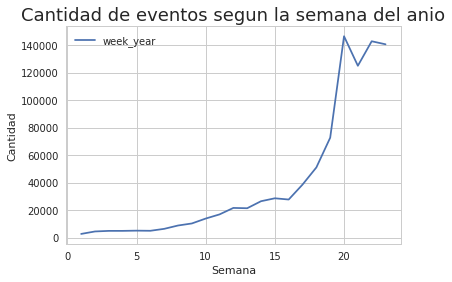

In [26]:
plot_events_per_week = events_count_per_week[['week_year']].plot.line()
plot_events_per_week.set_title("Cantidad de eventos segun la semana del anio", fontsize=18)
plot_events_per_week.set_xlabel("Semana")
plot_events_per_week.set_ylabel("Cantidad")

In [27]:
# Vemos los distintos tipos de accesos por primera vez
news_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.53
Computer                     0.45
Tablet                       0.02
Unknown                      0.00
Name: device_type, dtype: float64

In [28]:
# Seleccionamos los eventos de sitio visitado
visited_site = df.loc[df['event'] == 'visited site' , : ]
visited_site.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 31 columns):
timestamp                   87378 non-null datetime64[ns]
event                       87378 non-null object
person                      87378 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null category
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     87378 non-null category
new_vs_returning            87378 non-null category
city                        87378 non-null object
region                      87378 non-null object
country            

In [29]:
# Vemos cuanta proporcion hay de new y returning
new_vs_returning_count = visited_site['new_vs_returning'].value_counts()
print(new_vs_returning_count)

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64


Text(0,0.5,'Cantidad')

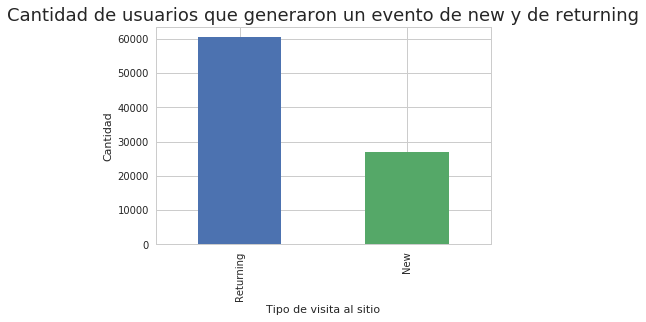

In [30]:
plot_new_vs_returning_counts = new_vs_returning_count.plot.bar()
plot_new_vs_returning_counts.set_title("Cantidad de usuarios que generaron un evento de new y de returning", fontsize=18)
plot_new_vs_returning_counts.set_xlabel("Tipo de visita al sitio")
plot_new_vs_returning_counts.set_ylabel("Cantidad")

In [31]:
# Queremos ver en que tipo de dispositivo acceden por primera vez los usuarios
news_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'New' , : ]
returning_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'Returning' , : ]
news_visited_site.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hour,month,week_year,week,year,day_week,month_day,is_weekend
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,23,5,22,22,2018,3,31,False
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,13,5,22,22,2018,1,29,False
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,20,4,15,15,2018,0,9,False
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,5,4,14,14,2018,4,6,False
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,0,5,20,20,2018,3,17,False


De aqui podemos observar que la primera vez que acceden los usuarios a trocafone es casi igual de parejo entre computadoras de escritorio y celulares.

Veamos que sucede si vemos el tipo de dispositivo con el que vuelven los usuarios a la plataforma.

In [32]:
# Vemos los distintos tipos de accesos en los eventos de visita
returning_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.49
Computer                     0.49
Tablet                       0.01
Unknown                      0.00
Name: device_type, dtype: float64

**Conclusion**: de estos datos inducimos que la experiencia del usuario en la plataforma es igual de buena tanto en mobile como en desktop

In [33]:
visited_site['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Italy                     7
Portugal                  7
Romania                   7
Russia                    6
Dominican Republic        6
Guadeloupe                6
Germany                   5
Paraguay                  4
Bangladesh                4
Colombia                  4
Switzerland               3
Morocco                   2
India                     2
Angola                    2
Ireland                   1
Spain                     1
Mexico                    1
Zimbabwe                  1
Denmark                   1
Belize                    1
Venezuela                 1
Philippines               1
Turkey                    1
South Africa        

In [34]:
len(visited_site)

87378

In [35]:
visited_site.dropna(axis='columns', inplace=True)

# Categorizamos las regiones geograficamente
visited_site['geo_region'] = np.nan

visited_site.loc[
    (visited_site['region'] == 'Sao Paulo') |
    (visited_site['region'] == 'Rio de Janeiro') |
    (visited_site['region'] == 'Minas Gerais') |
    (visited_site['region'] == 'Espirito Santo'), 
    'geo_region'
] = 'southeast'

visited_site.loc[
    (visited_site['region'] == 'Parana') |
    (visited_site['region'] == 'Rio Grande do Sul') |
    (visited_site['region'] == 'Santa Catarina'), 
    'geo_region'
] = 'south'

visited_site.loc[
    (visited_site['region'] == 'Federal District') |
    (visited_site['region'] == 'Goias') |
    (visited_site['region'] == 'Mato Grosso do Sul') |
    (visited_site['region'] == 'Mato Grosso'), 
    'geo_region'
] = 'center west'

visited_site.loc[
    (visited_site['region'] == 'Bahia') |
    (visited_site['region'] == 'Pernambuco') |
    (visited_site['region'] == 'Ceara') |
    (visited_site['region'] == 'Maranhao') |
    (visited_site['region'] == 'Rio Grande do Norte') |
    (visited_site['region'] == 'Paraíba') |
    (visited_site['region'] == 'Piaui') |
    (visited_site['region'] == 'Alagoas') |
    (visited_site['region'] == 'Sergipe'), 
    'geo_region'
] = 'northeast'

visited_site.loc[
    (visited_site['region'] == 'Para') |
    (visited_site['region'] == 'Amazonas') |
    (visited_site['region'] == 'Tocantins') |
    (visited_site['region'] == 'Amapa') |
    (visited_site['region'] == 'Rondonia') |
    (visited_site['region'] == 'Acre') |
    (visited_site['region'] == 'Roraima'), 
    'geo_region'
] = 'north'

In [36]:
visited_site_brazil = visited_site.loc[visited_site['country'] == 'Brazil']


cities = visited_site_brazil['city'].value_counts()
regions = visited_site_brazil['region'].value_counts()
countries = visited_site_brazil['country'].value_counts()
geo_region = visited_site_brazil['geo_region'].value_counts(normalize=True)
# print regions
# print countries
print(geo_region)
visited_site_brazil['geo_region'].count()


southeast                     0.57
northeast                     0.23
south                         0.09
center west                   0.06
north                         0.04
Name: geo_region, dtype: float64


71930

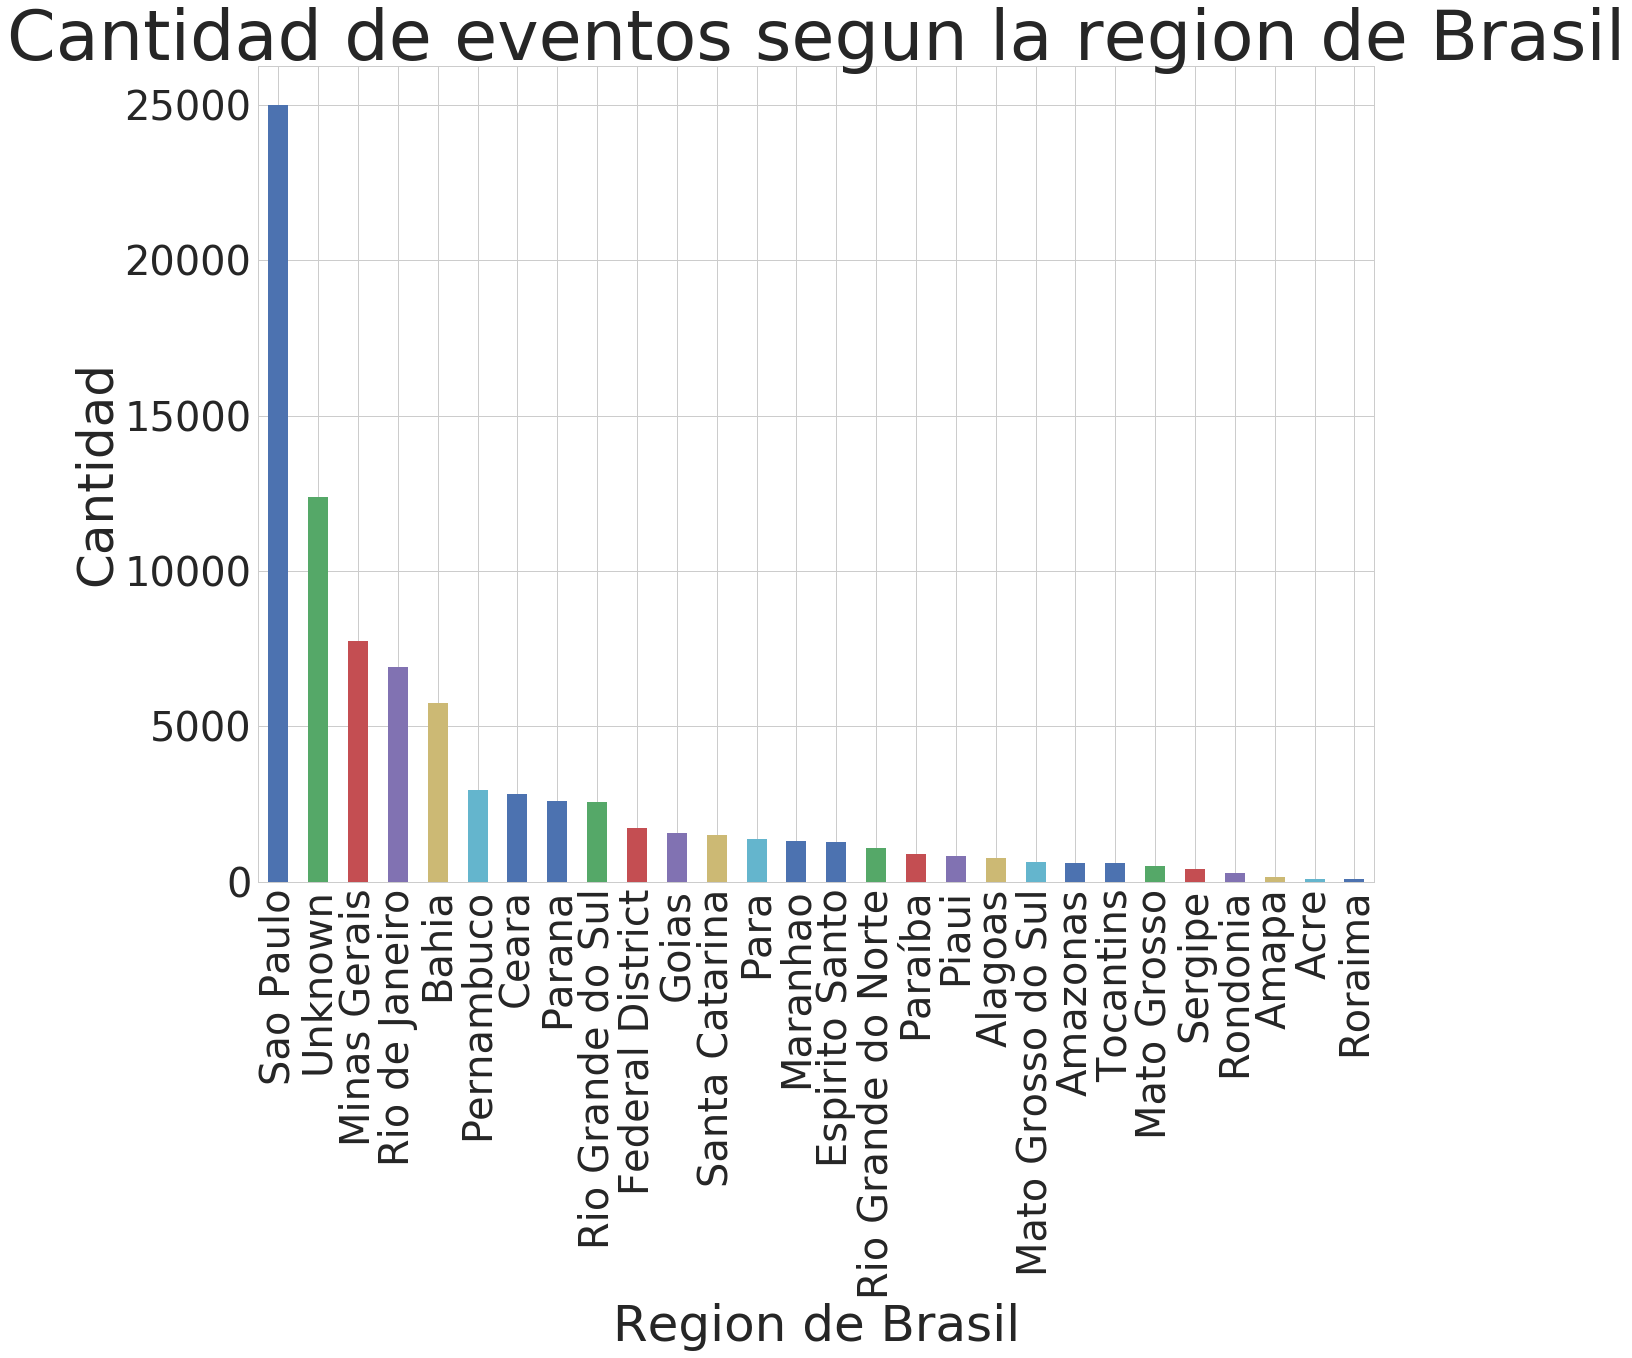

In [37]:
bar_regions_plot = regions.plot.bar(figsize=(20, 15), fontsize=40)
bar_regions_plot.set_title("Cantidad de eventos segun la region de Brasil", fontsize=70)
bar_regions_plot.set_xlabel("Region de Brasil", fontsize=50)
bar_regions_plot.set_ylabel("Cantidad", fontsize=50)
bar_regions_plot.get_figure().savefig('visited_per_region')

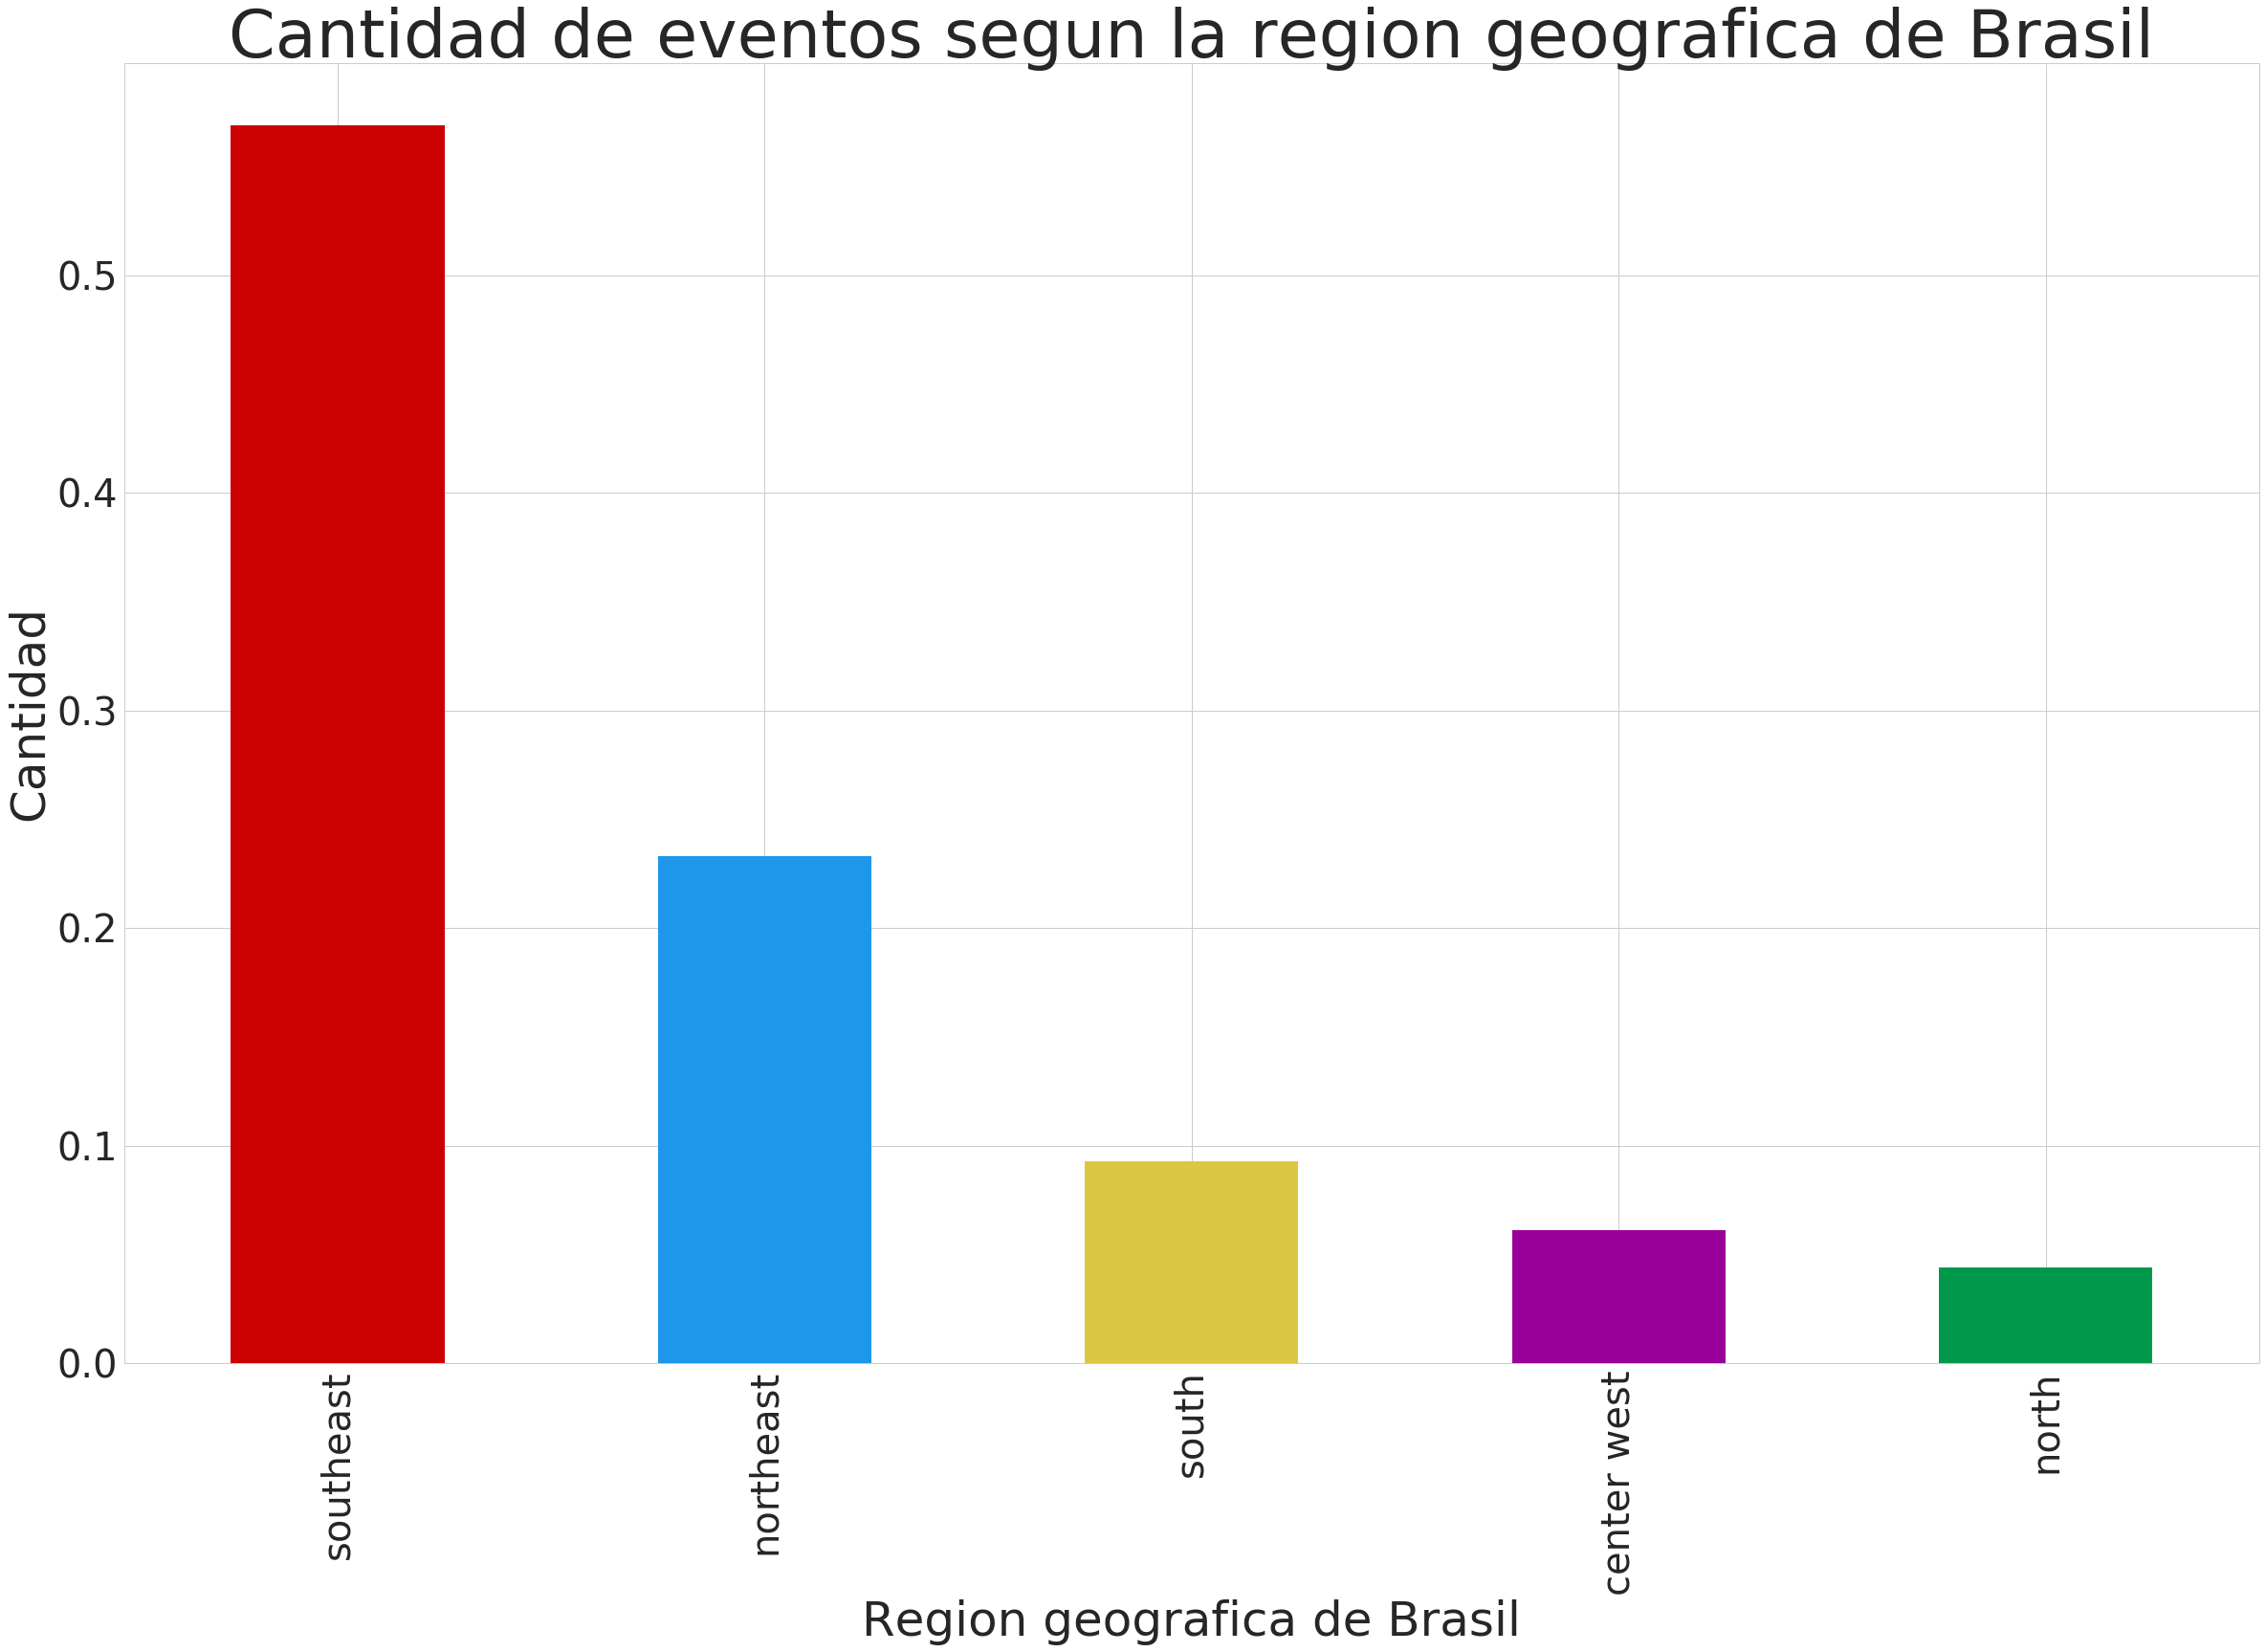

In [38]:
bar_geo_regions_plot = geo_region.plot.bar(figsize=(40, 25), fontsize=40, color=['#CC0000', '#1D97E9', '#DBC742', '#990099', '#00994C'])
bar_geo_regions_plot.set_title("Cantidad de eventos segun la region geografica de Brasil", fontsize=70)
bar_geo_regions_plot.set_xlabel("Region geografica de Brasil", fontsize=50)
bar_geo_regions_plot.set_ylabel("Cantidad", fontsize=50)
bar_geo_regions_plot.get_figure().savefig('visited_per_geo_region')

In [39]:
# Distintos tipos de dispositivos
visited_site_brazil['device_type'].value_counts()

Smartphone    42775
Computer      40239
Tablet         1180
Unknown         114
Name: device_type, dtype: int64

In [40]:
def reduceColumnLevel(df):
    l0 = df.columns.get_level_values(0)
    l1 = df.columns.get_level_values(1)
    df.columns = l0 + '_' + l1
    return df

In [41]:
visited_site_brazil_computer_or_smarthpone = visited_site_brazil.loc[(visited_site_brazil['device_type'] == 'Computer') | (visited_site_brazil['device_type'] == 'Smartphone')]

In [42]:
new_per_dispositive = visited_site_brazil_computer_or_smarthpone.loc[visited_site_brazil_computer_or_smarthpone['new_vs_returning'] == 'New']

Text(0,0.5,'Cantidad')

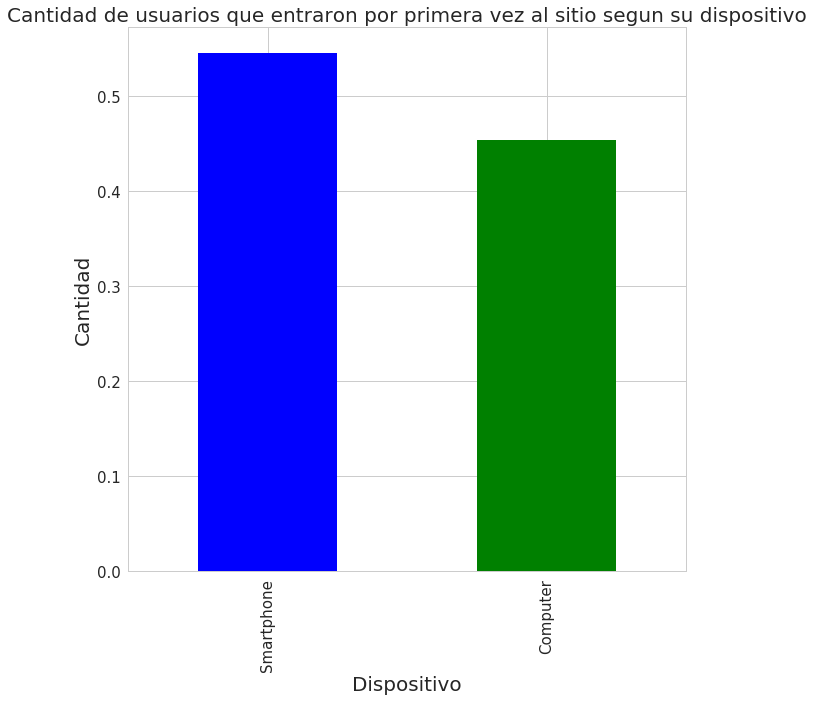

In [43]:
count_new_dispositive = new_per_dispositive['device_type'].value_counts(normalize=True)
plot_count_new_dispositive = count_new_dispositive.plot.bar(figsize=(10, 10), fontsize=15, color=['b', 'g'])
plot_count_new_dispositive.set_title("Cantidad de usuarios que entraron por primera vez al sitio segun su dispositivo", fontsize=20)
plot_count_new_dispositive.set_xlabel("Dispositivo", fontsize=20)
plot_count_new_dispositive.set_ylabel("Cantidad", fontsize=20)

In [44]:
returning_per_dispositive = visited_site_brazil_computer_or_smarthpone.loc[visited_site_brazil_computer_or_smarthpone['new_vs_returning'] == 'Returning']

Text(0,0.5,'Cantidad')

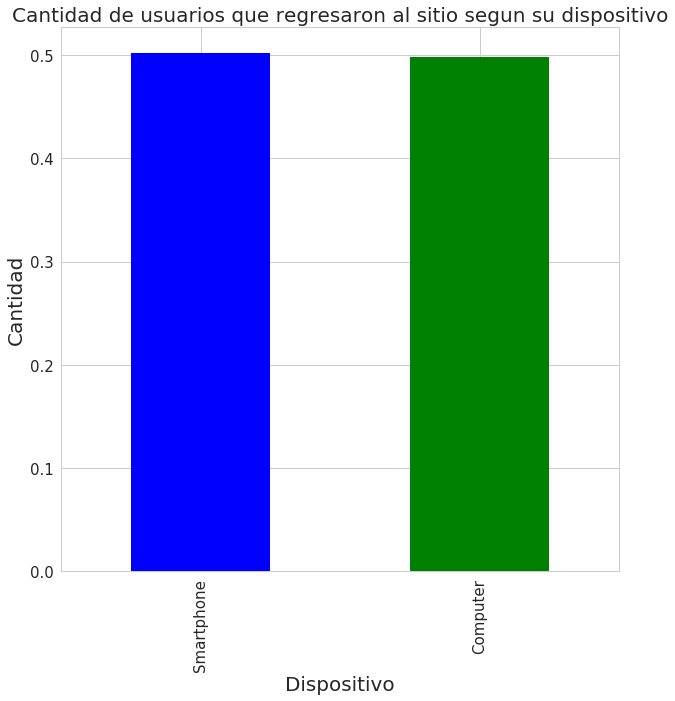

In [45]:
returning_per_dispositive['device_type'].value_counts(normalize=True)
count_ret_dispositive = returning_per_dispositive['device_type'].value_counts(normalize=True)
plot_count_ret_dispositive = count_ret_dispositive.plot.bar(figsize=(10, 10), fontsize=15, color=['b', 'g'])
plot_count_ret_dispositive.set_title("Cantidad de usuarios que regresaron al sitio segun su dispositivo", fontsize=20)
plot_count_ret_dispositive.set_xlabel("Dispositivo", fontsize=20)
plot_count_ret_dispositive.set_ylabel("Cantidad", fontsize=20)

In [46]:
devices_per_region = visited_site_brazil_computer_or_smarthpone.groupby(['geo_region', 'device_type']).agg({'event': ['count']})
devices_per_region.head(20)

event
                         count
geo_region  device_type       
center west Computer      2526
            Smartphone    1828
north       Computer      1632
            Smartphone    1476
northeast   Computer      7766
            Smartphone    8619
south       Computer      3737
            Smartphone    2857
southeast   Computer     18884
            Smartphone   21386

In [47]:
devices_per_region = reduceColumnLevel(devices_per_region)
devices_per_region.head(20)

event_count
geo_region  device_type             
center west Computer            2526
            Smartphone          1828
north       Computer            1632
            Smartphone          1476
northeast   Computer            7766
            Smartphone          8619
south       Computer            3737
            Smartphone          2857
southeast   Computer           18884
            Smartphone         21386

In [48]:
devices_per_region.unstack()

event_count           
device_type    Computer Smartphone
geo_region                        
center west        2526       1828
north              1632       1476
northeast          7766       8619
south              3737       2857
southeast         18884      21386

In [49]:
devices_per_region_pivot = devices_per_region.pivot_table(index='geo_region', columns='device_type', values='event_count')
devices_per_region_pivot = devices_per_region_pivot.sort_values(by='Computer', ascending=False)
devices_per_region_pivot

device_type,Computer,Smartphone
geo_region,,
southeast,18884,21386
northeast,7766,8619
south,3737,2857
center west,2526,1828
north,1632,1476


Text(0,0.5,'Cantidad de accesos')

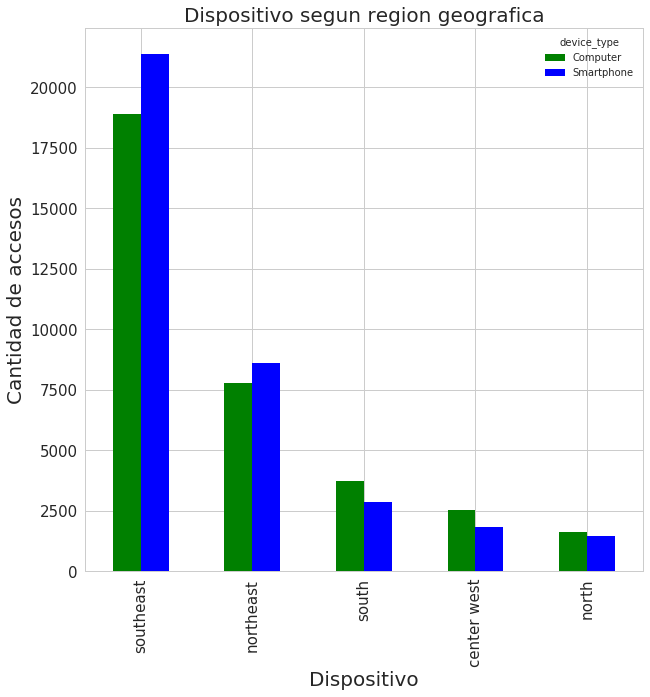

In [50]:
plot_devices_per_geo_region = devices_per_region_pivot.plot.bar(
    figsize=(10, 10), 
    fontsize=15,
    color=['g', 'b']
)
plot_devices_per_geo_region.set_title("Dispositivo segun region geografica", fontsize=20)
plot_devices_per_geo_region.set_xlabel("Dispositivo", fontsize=20)
plot_devices_per_geo_region.set_ylabel("Cantidad de accesos", fontsize=20)

In [51]:
def filterVisitedSitesByGeoRegion(df, region):
    return df.loc[df['geo_region'] == region]

In [52]:
def getWeekendVisites(df):
    return df.loc[df['is_weekend'] == True]

In [53]:
def getWeekdaysVisites(df):
    return df.loc[df['is_weekend'] == False]

In [54]:
# Accesos de los dispositivos segun la hora del dia en fin de semanas
tmp = visited_site_brazil_computer_or_smarthpone
visited_site_not_weekend = getWeekdaysVisites(tmp)
visited_site_weekend = getWeekendVisites(tmp)
devices_per_hour_on_weekend = visited_site_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})
devices_per_hour_on_weekend.head(10)

event
                 count
hour device_type      
0    Computer      474
     Smartphone    735
1    Computer      430
     Smartphone    667
2    Computer      380
     Smartphone    532
3    Computer      250
     Smartphone    346
4    Computer      120
     Smartphone    227

In [55]:
devices_per_hour_not_weekend = visited_site_not_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})
devices_per_hour_not_weekend.head(0)
# devices_per_hour_not_weekend.index

,,event
,,count
hour,device_type,


In [56]:
def plotEventCountByDevicePerHour(df, figsize=(8,8), fontsize=20):
    l0 = df.columns.get_level_values(0)
    l1 = df.columns.get_level_values(1)
    df.columns = l0 + '_' + l1
    unstacked = df.unstack()
    l0 = unstacked.columns.get_level_values(0)
    l1 = unstacked.columns.get_level_values(1)
    unstacked.columns = l0 + '_' + l1
    df_new = pd.DataFrame({
        'Computer': unstacked['event_count_Computer'],
        'Smartphone': unstacked['event_count_Smartphone'],
        }, 
        index=unstacked.index)
    plot = df_new.plot.line(figsize=figsize, fontsize=fontsize, color=['g', 'b'])
    # plot.legend(prop={'size': 5})
    return plot

devices_per_hour_not_weekend.head()

event
                 count
hour device_type      
0    Computer     1575
     Smartphone   2171
1    Computer     1410
     Smartphone   2125
2    Computer     1096

Text(0.5,1,'Cantidad de visitas segun el dispositivo en cada hora del dia (lunes a viernes)')

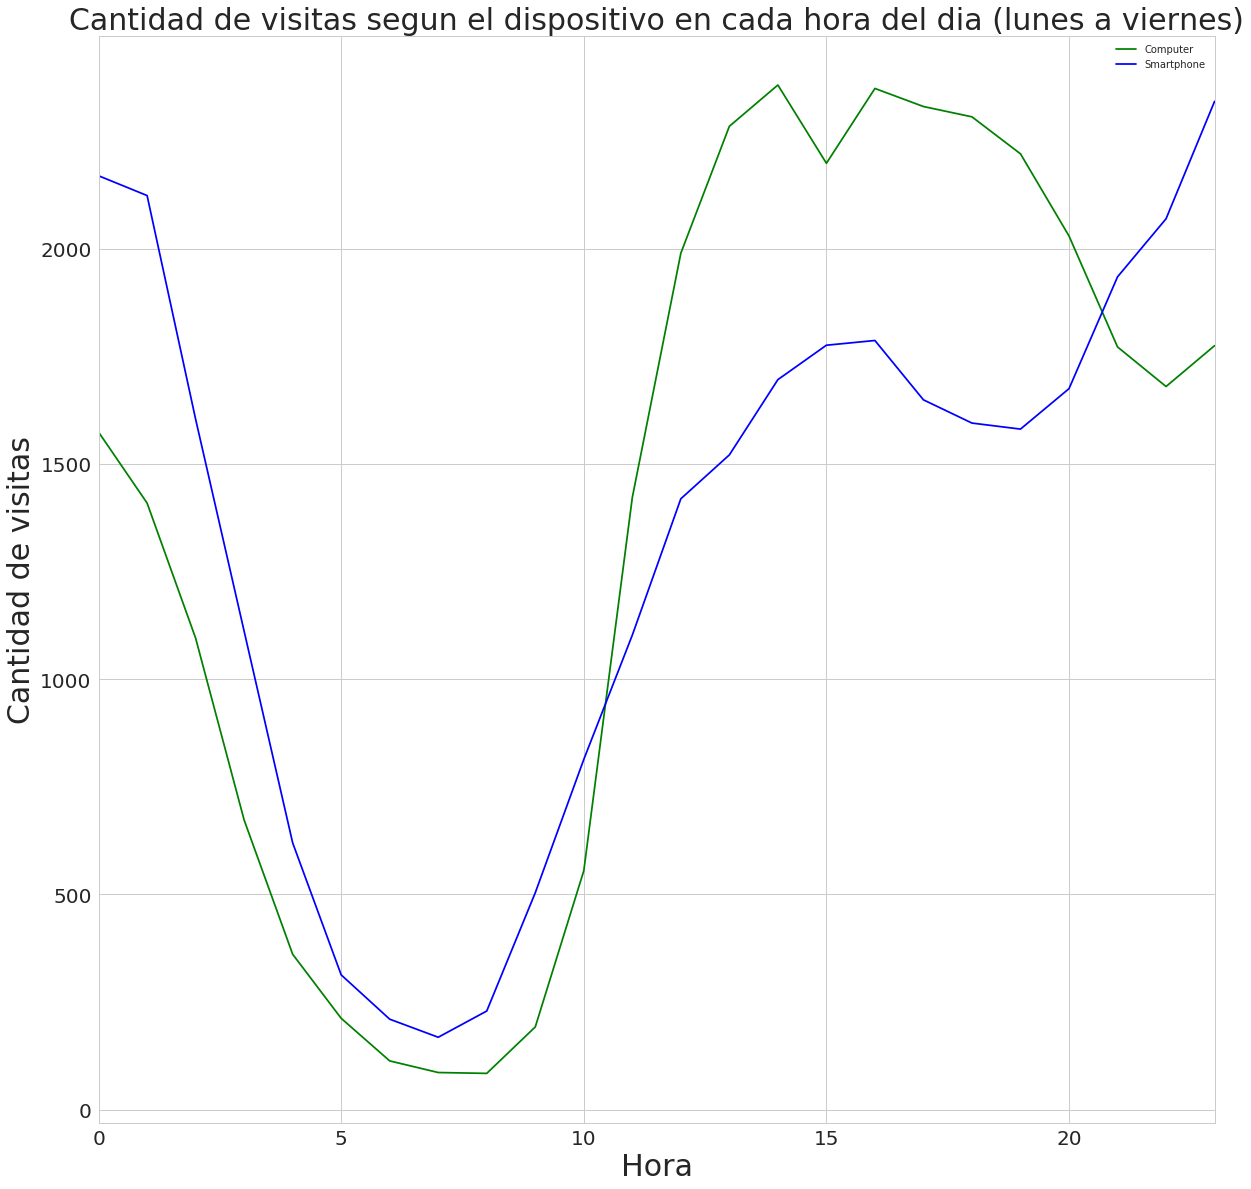

In [57]:
plot_on_weekdays = plotEventCountByDevicePerHour(devices_per_hour_not_weekend, figsize=(20,20))
plot_on_weekdays.set_xlim(0, 23)
plot_on_weekdays.set_xlabel('Hora', fontsize=30)
plot_on_weekdays.set_ylabel('Cantidad de visitas', fontsize=30)
plot_on_weekdays.set_title('Cantidad de visitas segun el dispositivo en cada hora del dia (lunes a viernes)', fontsize=30)

Text(0.5,1,'Cantidad de visitas segun el dispositivo en cada hora del dia (fin de semana)')

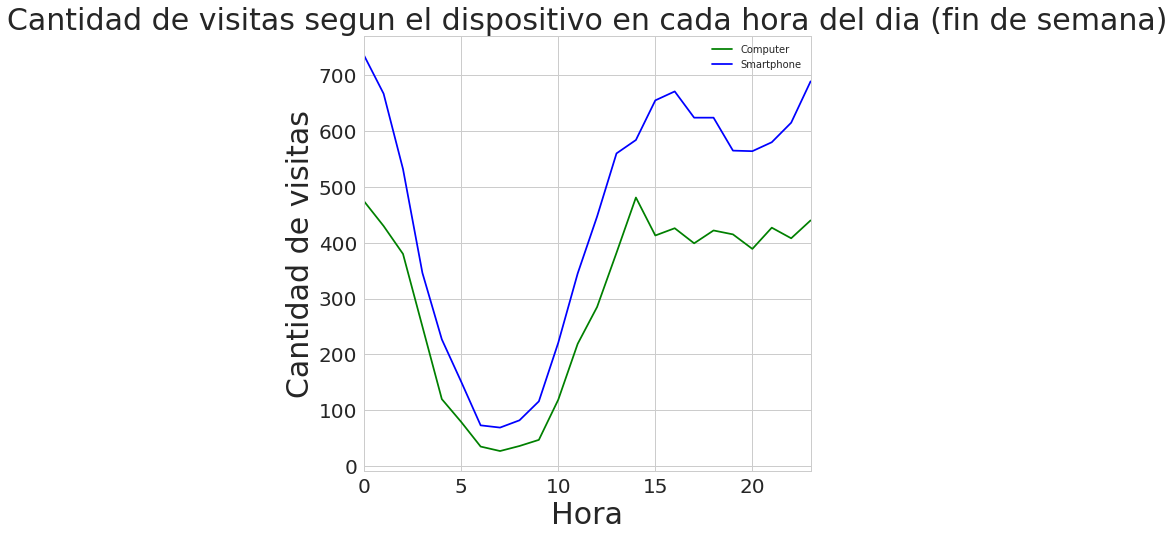

In [58]:
plot_on_weekend = plotEventCountByDevicePerHour(devices_per_hour_on_weekend)
plot_on_weekend.set_xlim(0, 23)
plot_on_weekend.set_xlabel('Hora', fontsize=30)
plot_on_weekend.set_ylabel('Cantidad de visitas', fontsize=30)
plot_on_weekend.set_title('Cantidad de visitas segun el dispositivo en cada hora del dia (fin de semana)', fontsize=30)

# Analisis de visitas segun horario particularizando en region
Ahora analizaremos las visitas segun el horario para los distintas regiones geograficas que se definieron previamente.

```
                        event_count
geo_region	device_type	

center west	Computer	2526
            Smartphone	1828
            
north	    Computer	1632
            Smartphone	1476
            
northeast	Computer	7766
            Smartphone	8619
            
south	    Computer	3737
            Smartphone	2857
            
southeast	Computer	18884
            Smartphone	21386
```

In [60]:
tmp = visited_site_brazil_computer_or_smarthpone

center_west = filterVisitedSitesByGeoRegion(tmp, 'center west')
north = filterVisitedSitesByGeoRegion(tmp, 'north')
northeast = filterVisitedSitesByGeoRegion(tmp, 'northeast')
south = filterVisitedSitesByGeoRegion(tmp, 'south')
southeast = filterVisitedSitesByGeoRegion(tmp, 'southeast')

# Filtamos por dia de seamana y fin de semana
center_west_weekdays = getWeekdaysVisites(center_west)
center_west_weekend = getWeekendVisites(center_west)

north_weekdays = getWeekdaysVisites(north)
north_weekend = getWeekendVisites(north)

northeast_weekdays = getWeekdaysVisites(northeast)
northeast_weekend = getWeekendVisites(northeast)

south_weekdays = getWeekdaysVisites(center_west)
south_weekend = getWeekendVisites(center_west)

southeast_weekdays = getWeekdaysVisites(southeast)
southeast_weekend = getWeekendVisites(southeast)

# Agrupamos
cw_group_wd = center_west_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
cw_group_we = center_west_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

n_group_wd = north_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
n_group_we = north_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

ne_group_wd = northeast_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
ne_group_we = northeast_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

s_group_wd = south_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
s_group_we = south_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

se_group_wd = southeast_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
se_group_we = southeast_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})



Text(0.5,1,'Fin de semana en el centro oeste')

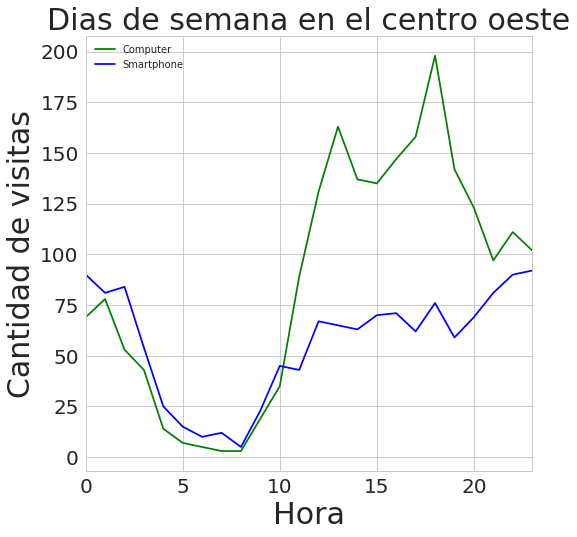

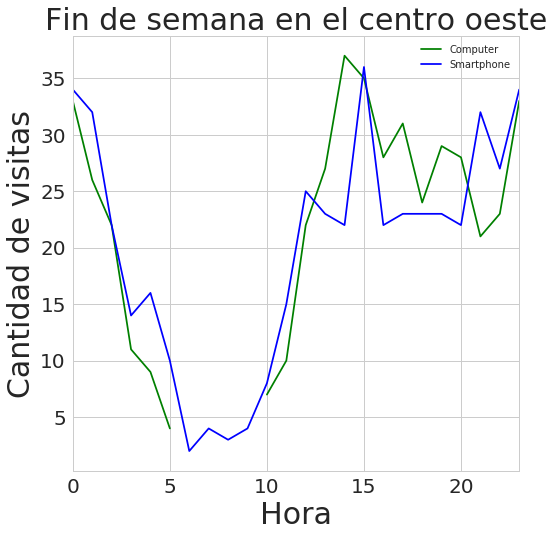

In [61]:
# Plot center west
p_cw_wd = plotEventCountByDevicePerHour(cw_group_wd)
p_cw_wd.set_xlim(0,23)
p_cw_wd.set_xlabel('Hora', fontsize=30)
p_cw_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_cw_wd.set_title('Dias de semana en el centro oeste', fontsize=30)

p_cw_we = plotEventCountByDevicePerHour(cw_group_we)
p_cw_we.set_xlim(0,23)
p_cw_we.set_xlabel('Hora', fontsize=30)
p_cw_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_cw_we.set_title('Fin de semana en el centro oeste', fontsize=30)

Text(0.5,1,'Fin de semana en el norte')

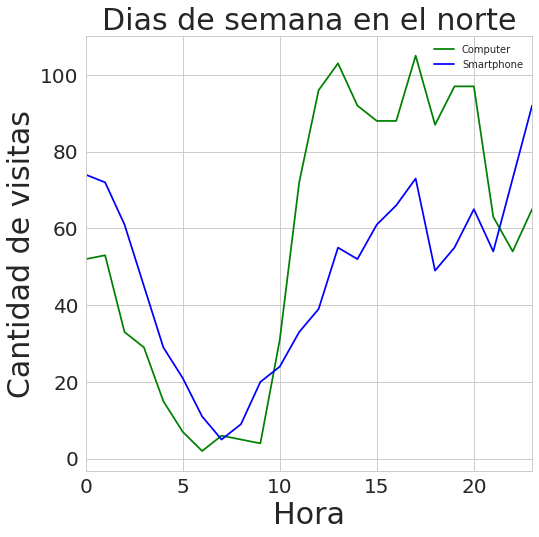

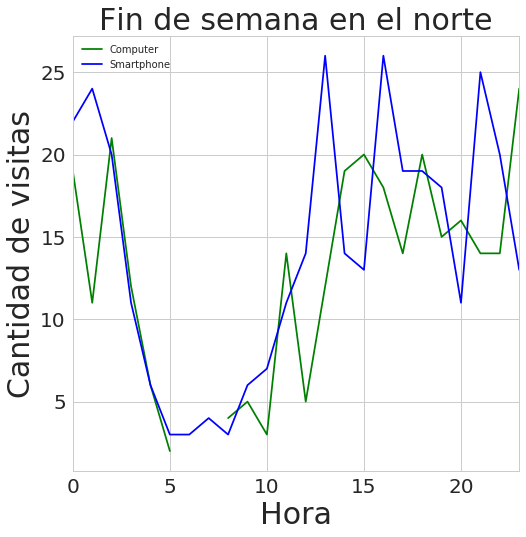

In [62]:
# Plot north
p_n_wd = plotEventCountByDevicePerHour(n_group_wd)
p_n_wd.set_xlim(0,23)
p_n_wd.set_xlabel('Hora', fontsize=30)
p_n_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_n_wd.set_title('Dias de semana en el norte', fontsize=30)

p_n_we = plotEventCountByDevicePerHour(n_group_we)
p_n_we.set_xlim(0,23)
p_n_we.set_xlabel('Hora', fontsize=30)
p_n_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_n_we.set_title('Fin de semana en el norte', fontsize=30)

Text(0.5,1,'Fin de semana en el noreste')

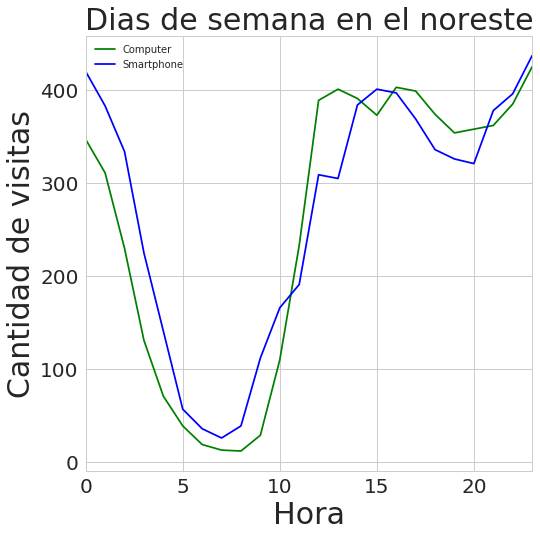

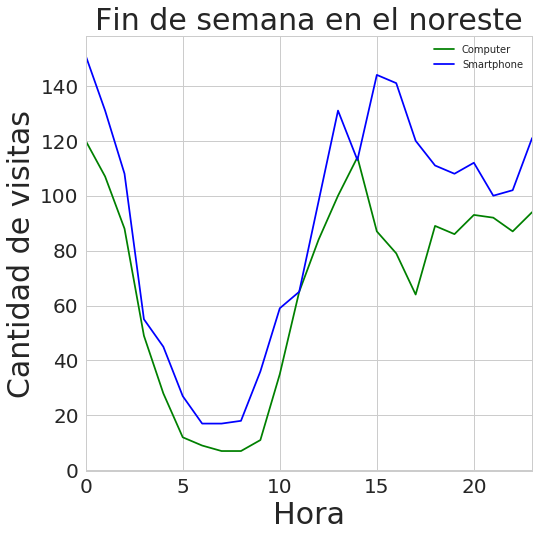

In [63]:
# Plot northeast
p_ne_wd = plotEventCountByDevicePerHour(ne_group_wd)
p_ne_wd.set_xlim(0,23)
p_ne_wd.set_xlabel('Hora', fontsize=30)
p_ne_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_ne_wd.set_title('Dias de semana en el noreste', fontsize=30)

p_ne_we = plotEventCountByDevicePerHour(ne_group_we)
p_ne_we.set_xlim(0,23)
p_ne_we.set_xlabel('Hora', fontsize=30)
p_ne_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_ne_we.set_title('Fin de semana en el noreste', fontsize=30)

Text(0.5,1,'Fin de semana en el sur')

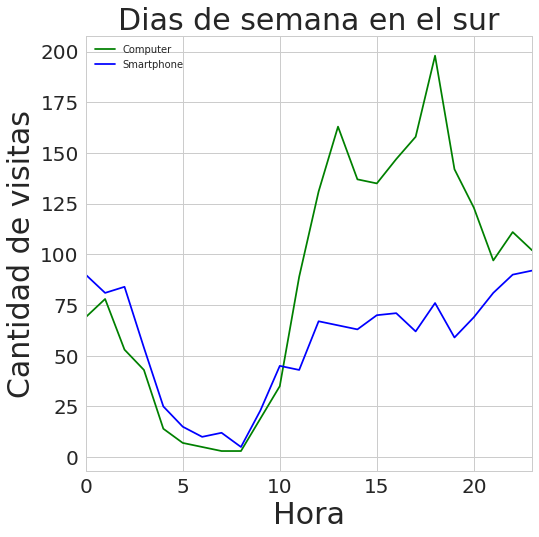

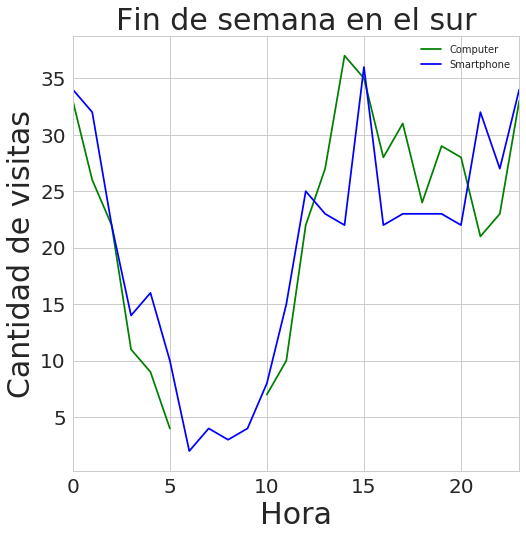

In [64]:
# Plot south
p_s_wd = plotEventCountByDevicePerHour(s_group_wd)
p_s_wd.set_xlim(0,23)
p_s_wd.set_xlabel('Hora', fontsize=30)
p_s_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_s_wd.set_title('Dias de semana en el sur', fontsize=30)

p_s_we = plotEventCountByDevicePerHour(s_group_we)
p_s_we.set_xlim(0,23)
p_s_we.set_xlabel('Hora', fontsize=30)
p_s_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_s_we.set_title('Fin de semana en el sur', fontsize=30)

Text(0.5,1,'Fin de semana en el sureste')

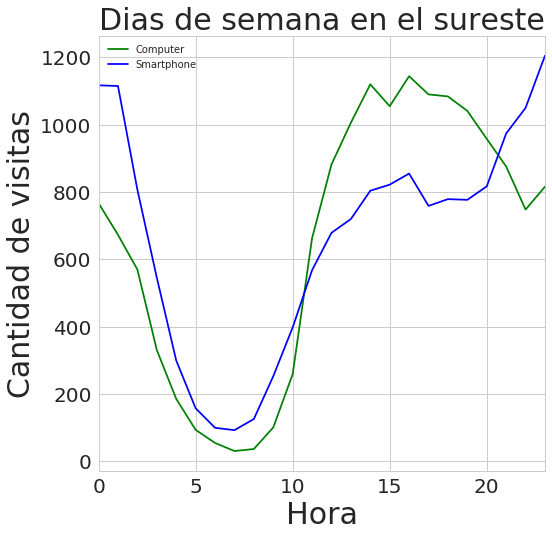

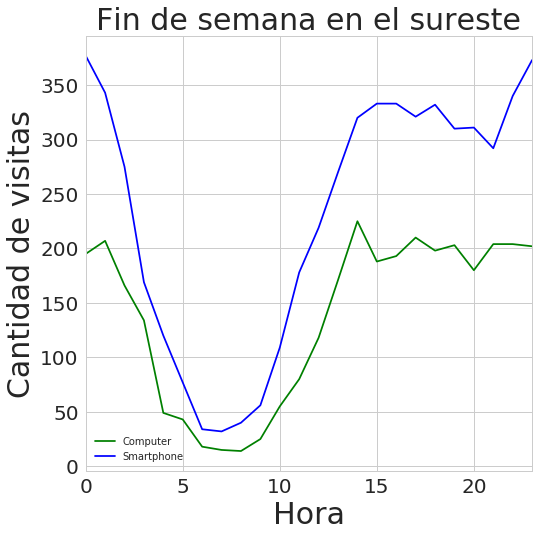

In [65]:
# Plot southeast
p_se_wd = plotEventCountByDevicePerHour(se_group_wd)
p_se_wd.set_xlim(0,23)
p_se_wd.set_xlabel('Hora', fontsize=30)
p_se_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_se_wd.set_title('Dias de semana en el sureste', fontsize=30)

p_se_we = plotEventCountByDevicePerHour(se_group_we)
p_se_we.set_xlim(0,23)
p_se_we.set_xlabel('Hora', fontsize=30)
p_se_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_se_we.set_title('Fin de semana en el sureste', fontsize=30)